In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/Emotions/'):
    for filename in filenames:
        (os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
import numpy as np 
import pandas as pd 

import random
import os
from tqdm import tqdm

import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa
import librosa.display
import librosa.effects as le
import IPython.display as ipd

from tensorflow.image import resize

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.image import resize
from tensorflow.keras.models import load_model
from sklearn.utils import shuffle
from tensorflow import keras
from tensorflow.keras import layers

from itertools import cycle

import joblib

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

2025-05-04 17:27:50.803557: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-04 17:27:50.810687: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-04 17:27:50.876968: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-04 17:27:50.935631: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746397670.984356   19176 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746397671.00

In [ ]:
base_path = './Emotions'


In [ ]:
# Load file paths using glob
angry = sorted(glob(os.path.join(base_path, 'Angry', '*.wav')))
fearful = sorted(glob(os.path.join(base_path, 'Fearful', '*.wav')))
happy = sorted(glob(os.path.join(base_path, 'Happy', '*.wav')))
sad = sorted(glob(os.path.join(base_path, 'Sad', '*.wav')))

# Data Processing

In [10]:
angry = glob(r'/kaggle/input/audio-emotions/Emotions/Angry/*.wav')
angry = sorted(angry)
Fearful = glob(r'/kaggle/input/audio-emotions/Emotions/Fearful/*.wav')
Fearful = sorted(Fearful)
Happy = glob(r'/kaggle/input/audio-emotions/Emotions/Happy/*.wav')
Happy = sorted(Happy)
Sad = glob(r'/kaggle/input/audio-emotions/Emotions/Sad/*.wav')
Sad = sorted(Sad)

In [11]:
##### angry testing 
angry_train=[]
label_angry=[]
target_shape=(128,128)
with tqdm(total=len(angry)) as pbar:
    for i in range (len(angry)):
        y, sr =librosa.load(angry[i], sr=None)
        y_stretched = le.time_stretch(y, rate=1)
        Mel_spectrogram = librosa.feature.melspectrogram(y=y_stretched , sr=sr)
        Mel_spectrogram = resize(np.expand_dims(Mel_spectrogram,axis=-1),target_shape)
        angry_train.append(Mel_spectrogram)
        label_angry.append(0)
        pbar.update(1)
print("heeey")

##### Fearful testing 
Fearful_train=[]
label_Fearful=[]
target_shape=(128,128)
with tqdm(total=len(Fearful)) as pbar:
    for i in range (len(Fearful)):
        y, sr =librosa.load(Fearful[i], sr=None)
        y_stretched = le.time_stretch(y, rate=1)
        Mel_spectrogram = librosa.feature.melspectrogram(y=y_stretched , sr=sr)
        Mel_spectrogram = resize(np.expand_dims(Mel_spectrogram,axis=-1),target_shape)
        Fearful_train.append(Mel_spectrogram)
        label_Fearful.append(2)

        pbar.update(1)
print("heeeey3")

##### happy testing 
Happy_train=[]
label_happy=[]
target_shape=(128,128)
with tqdm(total=len(Happy)) as pbar:
    for i in range (len(Happy)):
        y, sr =librosa.load(Happy[i], sr=None)
        y_stretched = le.time_stretch(y, rate=1)
        Mel_spectrogram = librosa.feature.melspectrogram(y=y_stretched , sr=sr)
        Mel_spectrogram = resize(np.expand_dims(Mel_spectrogram,axis=-1),target_shape)
        Happy_train.append(Mel_spectrogram)
        label_happy.append(3)
        y_stretched = le.time_stretch(y, rate=1.4)
        Mel_spectrogram = librosa.feature.melspectrogram(y=y_stretched , sr=sr)
        Mel_spectrogram = resize(np.expand_dims(Mel_spectrogram,axis=-1),target_shape)
        Happy_train.append(Mel_spectrogram)
        label_happy.append(3)
        pbar.update(1)
print("heeeey4")

##### Sad testing 
Sad_train=[]
label_Sad=[]
target_shape=(128,128)
with tqdm(total=len(Sad)) as pbar:
    for i in range (len(Sad)):
        y, sr =librosa.load(Sad[i], sr=None)
        y_stretched = le.time_stretch(y, rate=1)
        Mel_spectrogram = librosa.feature.melspectrogram(y=y_stretched , sr=sr)
        Mel_spectrogram = resize(np.expand_dims(Mel_spectrogram,axis=-1),target_shape)
        Sad_train.append(Mel_spectrogram)
        label_Sad.append(5)
        pbar.update(1)
print("heeeey6")

0it [00:00, ?it/s]


heeey


0it [00:00, ?it/s]


heeeey3


0it [00:00, ?it/s]


heeeey4


0it [00:00, ?it/s]

heeeey6


In [ ]:
crema=glob("/kaggle/input/speech-emotion-recognition-en/Crema/*.wav")

In [ ]:
#SAD - sadness;
#ANG - angry;
#DIS - disgust;
#FEA - fear;
#HAP - happy;
#NEU - neutral.


target_emotion1 = "ANG"
target_emotion2 = "SAD"
target_emotion3 = "DIS"
target_emotion4 = "FEA"
target_emotion5 = "HAP"
target_emotion6 = "NEU"


i=0
with tqdm(total=len(crema)) as pbar:
    for filename in crema:
        if target_emotion1 in filename:
            y, sr =librosa.load(crema[i], sr=None)
            y_stretched = le.time_stretch(y, rate=1)
            Mel_spectrogram = librosa.feature.melspectrogram(y=y_stretched , sr=sr)
            Mel_spectrogram = resize(np.expand_dims(Mel_spectrogram,axis=-1),target_shape)
            angry_train.append(Mel_spectrogram)
            label_angry.append(0)
            
        elif target_emotion2 in filename:
            y, sr =librosa.load(crema[i], sr=None)
            y_stretched = le.time_stretch(y, rate=1)
            Mel_spectrogram = librosa.feature.melspectrogram(y=y_stretched , sr=sr)
            Mel_spectrogram = resize(np.expand_dims(Mel_spectrogram,axis=-1),target_shape)
            Sad_train.append(Mel_spectrogram)
            label_Sad.append(5)
            
            
        elif target_emotion3 in filename:
            y, sr =librosa.load(crema[i], sr=None)
            y_stretched = le.time_stretch(y, rate=1)
            Mel_spectrogram = librosa.feature.melspectrogram(y=y_stretched , sr=sr)
            Mel_spectrogram = resize(np.expand_dims(Mel_spectrogram,axis=-1),target_shape)
            Disgusted_train.append(Mel_spectrogram)
            label_Disgusted.append(1)           
            
        elif target_emotion4 in filename:
            y, sr =librosa.load(crema[i], sr=None)
            y_stretched = le.time_stretch(y, rate=1)
            Mel_spectrogram = librosa.feature.melspectrogram(y=y_stretched , sr=sr)
            Mel_spectrogram = resize(np.expand_dims(Mel_spectrogram,axis=-1),target_shape)
            Fearful_train.append(Mel_spectrogram)
            label_Fearful.append(2)            
            
        elif target_emotion5 in filename:
            y, sr =librosa.load(crema[i], sr=None)
            y_stretched = le.time_stretch(y, rate=1)
            Mel_spectrogram = librosa.feature.melspectrogram(y=y_stretched , sr=sr)
            Mel_spectrogram = resize(np.expand_dims(Mel_spectrogram,axis=-1),target_shape)
            Happy_train.append(Mel_spectrogram)
            label_happy.append(3)            
            y_stretched = le.time_stretch(y, rate=1.3)
            Mel_spectrogram = librosa.feature.melspectrogram(y=y_stretched , sr=sr)
            Mel_spectrogram = resize(np.expand_dims(Mel_spectrogram,axis=-1),target_shape)
            Happy_train.append(Mel_spectrogram)
            label_happy.append(3)
            
        elif target_emotion6 in filename:
            y, sr =librosa.load(crema[i], sr=None)
            y_stretched = le.time_stretch(y, rate=1)
            Mel_spectrogram = librosa.feature.melspectrogram(y=y_stretched , sr=sr)
            Mel_spectrogram = resize(np.expand_dims(Mel_spectrogram,axis=-1),target_shape)
            Neutral_train.append(Mel_spectrogram)
            label_Neutral.append(4)            
            y_stretched = le.time_stretch(y, rate=1.3)
            Mel_spectrogram = librosa.feature.melspectrogram(y=y_stretched , sr=sr)
            Mel_spectrogram = resize(np.expand_dims(Mel_spectrogram,axis=-1),target_shape)
            Neutral_train.append(Mel_spectrogram)
            label_Neutral.append(4)           
            
            
            
        pbar.update(1)

        i=i+1

print("done")

0it [00:00, ?it/s]

done


In [ ]:
savee=glob("/kaggle/input/speech-emotion-recognition-en/Savee/*.wav")

In [ ]:
#'a' = 'anger'
#'d' = 'disgust'
#'f' = 'fear'
#'h' = 'happiness'
#'n' = 'neutral'
#'sa' = 'sadness'



#SAD - sadness;
#ANG - angry;
#DIS - disgust;
#FEA - fear;
#HAP - happy;
#NEU - neutral.


target_emotion1 = "a"
target_emotion2 = "sa"
target_emotion3 = "d"
target_emotion4 = "f"
target_emotion5 = "h"
target_emotion6 = "n"


i=0
with tqdm(total=len(savee)) as pbar:
    for filename in savee:
        if target_emotion1 in filename:
            y, sr =librosa.load(savee[i], sr=None)
            y_stretched = le.time_stretch(y, rate=1)
            Mel_spectrogram = librosa.feature.melspectrogram(y=y_stretched , sr=sr)
            Mel_spectrogram = resize(np.expand_dims(Mel_spectrogram,axis=-1),target_shape)
            angry_train.append(Mel_spectrogram)
            label_angry.append(0)
            
        elif target_emotion2 in filename:
            y, sr =librosa.load(savee[i], sr=None)
            y_stretched = le.time_stretch(y, rate=1)
            Mel_spectrogram = librosa.feature.melspectrogram(y=y_stretched , sr=sr)
            Mel_spectrogram = resize(np.expand_dims(Mel_spectrogram,axis=-1),target_shape)
            Sad_train.append(Mel_spectrogram)
            label_Sad.append(5)
            
            
        elif target_emotion3 in filename:
            y, sr =librosa.load(savee[i], sr=None)
            y_stretched = le.time_stretch(y, rate=1)
            Mel_spectrogram = librosa.feature.melspectrogram(y=y_stretched , sr=sr)
            Mel_spectrogram = resize(np.expand_dims(Mel_spectrogram,axis=-1),target_shape)
            Disgusted_train.append(Mel_spectrogram)
            label_Disgusted.append(1)           
            
        elif target_emotion4 in filename:
            y, sr =librosa.load(savee[i], sr=None)
            y_stretched = le.time_stretch(y, rate=1)
            Mel_spectrogram = librosa.feature.melspectrogram(y=y_stretched , sr=sr)
            Mel_spectrogram = resize(np.expand_dims(Mel_spectrogram,axis=-1),target_shape)
            Fearful_train.append(Mel_spectrogram)
            label_Fearful.append(2)            
            
        elif target_emotion5 in filename:
            y, sr =librosa.load(savee[i], sr=None)
            y_stretched = le.time_stretch(y, rate=1)
            Mel_spectrogram = librosa.feature.melspectrogram(y=y_stretched , sr=sr)
            Mel_spectrogram = resize(np.expand_dims(Mel_spectrogram,axis=-1),target_shape)
            Happy_train.append(Mel_spectrogram)
            label_happy.append(3)            
            y_stretched = le.time_stretch(y, rate=1.3)
            Mel_spectrogram = librosa.feature.melspectrogram(y=y_stretched , sr=sr)
            Mel_spectrogram = resize(np.expand_dims(Mel_spectrogram,axis=-1),target_shape)
            Happy_train.append(Mel_spectrogram)
            label_happy.append(3)
            
        elif target_emotion6 in filename:
            y, sr =librosa.load(savee[i], sr=None)
            y_stretched = le.time_stretch(y, rate=1)
            Mel_spectrogram = librosa.feature.melspectrogram(y=y_stretched , sr=sr)
            Mel_spectrogram = resize(np.expand_dims(Mel_spectrogram,axis=-1),target_shape)
            Neutral_train.append(Mel_spectrogram)
            label_Neutral.append(4)            
            y_stretched = le.time_stretch(y, rate=1.3)
            Mel_spectrogram = librosa.feature.melspectrogram(y=y_stretched , sr=sr)
            Mel_spectrogram = resize(np.expand_dims(Mel_spectrogram,axis=-1),target_shape)
            Neutral_train.append(Mel_spectrogram)
            label_Neutral.append(4)           
            
            
            
        pbar.update(1)

        i=i+1

print("done!")


0it [00:00, ?it/s]

done!


# Model 1

In [ ]:
exp_train=Happy_train+angry_train+Disgusted_train+Fearful_train+Neutral_train+Sad_train
exp_label=label_happy+label_angry+label_Disgusted+label_Fearful+label_Neutral+label_Sad

for i in range(len(exp_label)):
    if exp_label[i]==1 or exp_label[i]==2 or exp_label[i]==5 :
        exp_label[i]=0

for i in range(len(exp_label)):
    if exp_label[i]==4 or exp_label[i]==3:
        exp_label[i]=1
        
np.array(exp_label)
np.array(exp_train)

combined = list(zip(exp_train,exp_label))
random.shuffle(combined)
exp_train, exp_label = zip(*combined)

print("done!")

done!


In [ ]:
labels = to_categorical(exp_label, num_classes=2) 

X_train, X_test, y_train, y_test = train_test_split(exp_train, labels, test_size=0.25, random_state=42)

# Neural network model
input_shape = X_train[0].shape
input_layer = Input(shape=input_shape)
x = Conv2D(16, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(32, activation='relu')(x)
output_layer = Dense(2, activation='softmax')(x)
model = keras.Model(inputs=input_layer, outputs=output_layer)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
X_train = tf.stack(X_train)
y_train = tf.stack(y_train)
X_test = tf.stack(X_test)
y_test = tf.stack(y_test)

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
test_accuracy=model.evaluate(X_test,y_test,verbose=0)

print("\n Accuracy= ",test_accuracy[1])

Epoch 1/10
379/379 [==============================] - 12s 9ms/step - loss: 0.7450 - accuracy: 0.5651 - val_loss: 0.6606 - val_accuracy: 0.5868
Epoch 2/10
379/379 [==============================] - 3s 8ms/step - loss: 0.6374 - accuracy: 0.5877 - val_loss: 0.6510 - val_accuracy: 0.6007
Epoch 3/10
379/379 [==============================] - 3s 8ms/step - loss: 0.6038 - accuracy: 0.6059 - val_loss: 0.7415 - val_accuracy: 0.6329
Epoch 4/10
379/379 [==============================] - 3s 7ms/step - loss: 0.5717 - accuracy: 0.6372 - val_loss: 0.6141 - val_accuracy: 0.6358
Epoch 5/10
379/379 [==============================] - 3s 7ms/step - loss: 0.5360 - accuracy: 0.6590 - val_loss: 0.5849 - val_accuracy: 0.6507
Epoch 6/10
379/379 [==============================] - 3s 7ms/step - loss: 0.5254 - accuracy: 0.6797 - val_loss: 0.5767 - val_accuracy: 0.6744
Epoch 7/10
379/379 [==============================] - 3s 7ms/step - loss: 0.5037 - accuracy: 0.7124 - val_loss: 0.5994 - val_accuracy: 0.6917
Epoch

In [ ]:
joblib.dump(model, 'Emotion_Audio_Model.pkl')

['Emotion_Audio_Model.pkl']

# Model 2

In [ ]:
# Negative 
exp_train_2=angry_train+Disgusted_train+Fearful_train+Sad_train
exp_label_2=label_angry+label_Disgusted+label_Fearful+label_Sad

for i in range(len(exp_label_2)):
    if exp_label_2[i]==5 :
        exp_label_2[i]=3
        
np.array(exp_label_2)
np.array(exp_train_2)


combined = list(zip(exp_train_2,exp_label_2))
random.shuffle(combined)
exp_train_2, exp_label_2 = zip(*combined)

print("done!")

done!


In [ ]:
labels_2 = to_categorical(exp_label_2, num_classes=4) 

X_train, X_test, y_train, y_test = train_test_split(exp_train_2, labels_2, test_size=0.25, random_state=42)

# Neural network model
input_shape = X_train[0].shape
input_layer = Input(shape=input_shape)
x = Conv2D(16, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(32, activation='relu')(x)
output_layer = Dense(4, activation='softmax')(x)
model2 = keras.Model(inputs=input_layer, outputs=output_layer)

model2.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
X_train = tf.stack(X_train)
y_train = tf.stack(y_train)
X_test = tf.stack(X_test)
y_test = tf.stack(y_test)

In [ ]:
model2.fit(X_train, y_train, epochs=7, batch_size=35, validation_data=(X_test, y_test))
test_accuracy=model2.evaluate(X_test,y_test,verbose=0)

print("\n Accuracy= ",test_accuracy[1])

Epoch 1/7
177/177 [==============================] - 3s 10ms/step - loss: 1.7913 - accuracy: 0.3922 - val_loss: 1.4344 - val_accuracy: 0.4367
Epoch 2/7
177/177 [==============================] - 1s 7ms/step - loss: 1.1551 - accuracy: 0.5429 - val_loss: 1.1959 - val_accuracy: 0.5711
Epoch 3/7
177/177 [==============================] - 1s 7ms/step - loss: 1.0257 - accuracy: 0.5939 - val_loss: 1.1343 - val_accuracy: 0.5837
Epoch 4/7
177/177 [==============================] - 1s 7ms/step - loss: 0.9436 - accuracy: 0.6183 - val_loss: 1.4798 - val_accuracy: 0.5915
Epoch 5/7
177/177 [==============================] - 1s 7ms/step - loss: 0.9236 - accuracy: 0.6358 - val_loss: 1.3865 - val_accuracy: 0.5915
Epoch 6/7
177/177 [==============================] - 1s 7ms/step - loss: 0.9549 - accuracy: 0.6450 - val_loss: 1.2158 - val_accuracy: 0.6157
Epoch 7/7
177/177 [==============================] - 1s 7ms/step - loss: 0.8546 - accuracy: 0.6510 - val_loss: 1.2465 - val_accuracy: 0.6041

 Accuracy= 

In [ ]:
joblib.dump(model2, 'Emotion_Audio_Model2.pkl')

['Emotion_Audio_Model2.pkl']

# Model 3

In [ ]:
# Positive
exp_train_3=Happy_train+Neutral_train
exp_label_3=label_happy+label_Neutral

for i in range(len(exp_label_3)):
    if exp_label_3[i]==3 :
        exp_label_3[i]=0
    elif exp_label_3[i]==4:
        exp_label_3[i]=1
        
np.array(exp_label_3)
np.array(exp_train_3)

combined = list(zip(exp_train_3,exp_label_3))
random.shuffle(combined)
exp_train_3, exp_label_3 = zip(*combined)

print("done!")

done!


In [ ]:
labels_3 = to_categorical(exp_label_3, num_classes=2) 

X_train, X_test, y_train, y_test = train_test_split(exp_train_3, labels_3, test_size=0.25, random_state=42)

# Neural network model
input_shape = X_train[0].shape
input_layer = Input(shape=input_shape)
x = Conv2D(16, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(32, activation='relu')(x)
output_layer = Dense(2, activation='softmax')(x)
model3 = keras.Model(inputs=input_layer, outputs=output_layer)

model3.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
X_train = tf.stack(X_train)
y_train = tf.stack(y_train)
X_test = tf.stack(X_test)
y_test = tf.stack(y_test)


In [ ]:
model3.fit(X_train, y_train, epochs=10, batch_size=25, validation_data=(X_test, y_test))
test_accuracy=model3.evaluate(X_test,y_test,verbose=0)

print("\n Accuracy= ",test_accuracy[1])

Epoch 1/10
238/238 [==============================] - 3s 8ms/step - loss: 0.8677 - accuracy: 0.6927 - val_loss: 0.5231 - val_accuracy: 0.7123
Epoch 2/10
238/238 [==============================] - 1s 6ms/step - loss: 0.4728 - accuracy: 0.7873 - val_loss: 0.4541 - val_accuracy: 0.7829
Epoch 3/10
238/238 [==============================] - 1s 6ms/step - loss: 0.3879 - accuracy: 0.8295 - val_loss: 0.3941 - val_accuracy: 0.8228
Epoch 4/10
238/238 [==============================] - 1s 6ms/step - loss: 0.3328 - accuracy: 0.8576 - val_loss: 0.3555 - val_accuracy: 0.8385
Epoch 5/10
238/238 [==============================] - 2s 7ms/step - loss: 0.2821 - accuracy: 0.8820 - val_loss: 0.3587 - val_accuracy: 0.8627
Epoch 6/10
238/238 [==============================] - 1s 6ms/step - loss: 0.2711 - accuracy: 0.8935 - val_loss: 0.3149 - val_accuracy: 0.8602
Epoch 7/10
238/238 [==============================] - 1s 6ms/step - loss: 0.2278 - accuracy: 0.9054 - val_loss: 0.3036 - val_accuracy: 0.8602
Epoch 

In [ ]:
joblib.dump(model3, 'Emotion_Audio_Model3.pkl')

['Emotion_Audio_Model3.pkl']

# Model 4

In [ ]:
# Between sad and nuetral
exp_train_4=Neutral_train+Sad_train
exp_label_4=label_Neutral+label_Sad

for i in range(len(exp_label_4)):
    if exp_label_4[i]==5 :
        exp_label_4[i]=0
    elif exp_label_4[i]==4:
        exp_label_4[i]=1
        
np.array(exp_label_4)
np.array(exp_train_4)

combined = list(zip(exp_train_4,exp_label_4))
random.shuffle(combined)
exp_train_4, exp_label_4 = zip(*combined)

print("done!")

done!


In [ ]:
labels_4 = to_categorical(exp_label_4, num_classes=2) 

X_train, X_test, y_train, y_test = train_test_split(exp_train_4, labels_4, test_size=0.25, random_state=42)

# Neural network model
input_shape = X_train[0].shape
input_layer = Input(shape=input_shape)
x = Conv2D(16, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(32, activation='relu')(x)
output_layer = Dense(2, activation='softmax')(x)
model4 = keras.Model(inputs=input_layer, outputs=output_layer)

model4.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
X_train = tf.stack(X_train)
y_train = tf.stack(y_train)
X_test = tf.stack(X_test)
y_test = tf.stack(y_test)

In [ ]:
model4.fit(X_train, y_train, epochs=10, batch_size=25, validation_data=(X_test, y_test))
test_accuracy=model4.evaluate(X_test,y_test,verbose=0)

print("\n Accuracy= ",test_accuracy[1])

Epoch 1/10
173/173 [==============================] - 3s 8ms/step - loss: 0.7063 - accuracy: 0.7355 - val_loss: 0.4575 - val_accuracy: 0.7910
Epoch 2/10
173/173 [==============================] - 1s 6ms/step - loss: 0.4705 - accuracy: 0.8038 - val_loss: 0.4243 - val_accuracy: 0.8049
Epoch 3/10
173/173 [==============================] - 1s 6ms/step - loss: 0.3989 - accuracy: 0.8246 - val_loss: 0.4539 - val_accuracy: 0.8132
Epoch 4/10
173/173 [==============================] - 1s 6ms/step - loss: 0.3402 - accuracy: 0.8425 - val_loss: 0.3831 - val_accuracy: 0.8257
Epoch 5/10
173/173 [==============================] - 1s 6ms/step - loss: 0.2955 - accuracy: 0.8714 - val_loss: 0.3799 - val_accuracy: 0.8375
Epoch 6/10
173/173 [==============================] - 1s 6ms/step - loss: 0.2594 - accuracy: 0.8835 - val_loss: 0.3745 - val_accuracy: 0.8438
Epoch 7/10
173/173 [==============================] - 1s 6ms/step - loss: 0.2516 - accuracy: 0.8951 - val_loss: 0.5509 - val_accuracy: 0.8438
Epoch 

In [ ]:
joblib.dump(model4, 'Emotion_Audio_Model4.pkl')

['Emotion_Audio_Model4.pkl']

# Model 5

In [ ]:
# Between happy and angry
exp_train_5=Happy_train+angry_train
exp_label_5=label_happy+label_angry

for i in range(len(exp_label_5)):
    if exp_label_5[i]==3 :
        exp_label_5[i]=1
        
np.array(exp_label_5)
np.array(exp_train_5)

combined = list(zip(exp_train_5,exp_label_5))
random.shuffle(combined)
exp_train_5, exp_label_5 = zip(*combined)

print("done!")

done!


In [ ]:
labels_5 = to_categorical(exp_label_5, num_classes=2) 

X_train, X_test, y_train, y_test = train_test_split(exp_train_5, labels_5, test_size=0.25, random_state=42)

# Neural network model
input_shape = X_train[0].shape
input_layer = Input(shape=input_shape)
x = Conv2D(16, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(32, activation='relu')(x)
output_layer = Dense(2, activation='softmax')(x)
model5 = keras.Model(inputs=input_layer, outputs=output_layer)

model5.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
X_train = tf.stack(X_train)
y_train = tf.stack(y_train)
X_test = tf.stack(X_test)
y_test = tf.stack(y_test)


In [ ]:
model5.fit(X_train, y_train, epochs=10, batch_size=25, validation_data=(X_test, y_test))
test_accuracy=model5.evaluate(X_test,y_test,verbose=0)

print("\n Accuracy= ",test_accuracy[1])

Epoch 1/10
195/195 [==============================] - 3s 7ms/step - loss: 1.2876 - accuracy: 0.7143 - val_loss: 0.6543 - val_accuracy: 0.7288
Epoch 2/10
195/195 [==============================] - 1s 5ms/step - loss: 0.5842 - accuracy: 0.7481 - val_loss: 0.7193 - val_accuracy: 0.7288
Epoch 3/10
195/195 [==============================] - 1s 5ms/step - loss: 0.5204 - accuracy: 0.7543 - val_loss: 0.5438 - val_accuracy: 0.7392
Epoch 4/10
195/195 [==============================] - 1s 5ms/step - loss: 0.4321 - accuracy: 0.7698 - val_loss: 0.5172 - val_accuracy: 0.7423
Epoch 5/10
195/195 [==============================] - 1s 5ms/step - loss: 0.4039 - accuracy: 0.7834 - val_loss: 0.5020 - val_accuracy: 0.7491
Epoch 6/10
195/195 [==============================] - 1s 5ms/step - loss: 0.3756 - accuracy: 0.7916 - val_loss: 0.5838 - val_accuracy: 0.7608
Epoch 7/10
195/195 [==============================] - 1s 5ms/step - loss: 0.4355 - accuracy: 0.7947 - val_loss: 0.6131 - val_accuracy: 0.7638
Epoch 

In [ ]:
joblib.dump(model5, 'Emotion_Audio_Model5.pkl')

['Emotion_Audio_Model5.pkl']

# Prediction

In [ ]:
#prerpcessing
def predict_model(audio1):       
    target_shape=(128,128)
    y, sr =librosa.load(audio1, sr=None)
    y_stretched = le.time_stretch(y, rate=1)
    Mel_spectrogram = librosa.feature.melspectrogram(y=y_stretched , sr=sr)
    Mel_spectrogram = resize(np.expand_dims(Mel_spectrogram,axis=-1),target_shape)
    Mel_spectrogram = tf.reshape(Mel_spectrogram, (1,) + target_shape + (1,))

    return Mel_spectrogram

In [ ]:
#prediction
def models_system(MSG):
    
    predictions = model.predict(MSG)
    class_probabilities = predictions[0]
    predicted_class_index = np.argmax(class_probabilities)

    if predicted_class_index==0:#negative
        predictions = model2.predict(MSG)
        class_probabilities = predictions[0]
        predicted_class_index = np.argmax(class_probabilities)

        if predicted_class_index==0:#model5
            predictions = model5.predict(MSG)
            class_probabilities = predictions[0]
            predicted_class_index = np.argmax(class_probabilities)
            if predicted_class_index==0:
                Final_pred="Angry"
            elif predicted_class_index==1:
                Final_pred="Happy"   
            
        elif predicted_class_index==1:
            Final_pred="Disgusted"
        elif predicted_class_index==2:
            Final_pred="Fearful"        
        elif predicted_class_index==3:#model4
            predictions = model4.predict(MSG)
            class_probabilities = predictions[0]
            predicted_class_index = np.argmax(class_probabilities)
            if predicted_class_index==0:
                Final_pred="Sad"
            elif predicted_class_index==1:
                Final_pred="Neutral"

    elif predicted_class_index==1:#positive
        predictions = model3.predict(MSG)
        class_probabilities = predictions[0]
        predicted_class_index = np.argmax(class_probabilities)

        if predicted_class_index==0:#model5
            predictions = model5.predict(MSG)
            class_probabilities = predictions[0]
            predicted_class_index = np.argmax(class_probabilities)
            if predicted_class_index==0:
                Final_pred="Angry"
            elif predicted_class_index==1:
                Final_pred="Happy"     
            
            
        elif predicted_class_index==1:#model4
            predictions = model4.predict(MSG)
            class_probabilities = predictions[0]
            predicted_class_index = np.argmax(class_probabilities)
            if predicted_class_index==0:
                Final_pred="Sad"
            elif predicted_class_index==1:
                Final_pred="Neutral"
    return Final_pred

In [ ]:
test_angry=glob('/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/*.wav')
test_nutral=glob("/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/*.wav")
test_fear=glob("/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/*.wav")
test_sad=glob("/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/*.wav")
test_disgust=glob("/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/*.wav")
test_happy=glob("/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/*.wav")

In [ ]:
%%capture
# Testing the model
acc=[]

counter=0
for i in range(len(test_happy)):
    MSG = predict_model(test_happy[i])
    if models_system(MSG)=="Happy":
        counter=counter+1
happy_acc=counter/ 200
acc.append(happy_acc)

counter=0
for i in range(len(test_angry)):
    MSG = predict_model(test_angry[i])
    if models_system(MSG)=="Angry":
        counter=counter+1
happy_acc=counter/200
acc.append(happy_acc)

counter=0
for i in range(len(test_nutral)):
    MSG = predict_model(test_nutral[i])
    if models_system(MSG)=="Neutral":
        counter=counter+1
happy_acc=counter/200
acc.append(happy_acc)

counter=0
for i in range(len(test_sad)):
    MSG = predict_model(test_sad[i])
    if models_system(MSG)=="Sad":
        counter=counter+1
happy_acc=counter/200
acc.append(happy_acc)

counter=0
for i in range(len(test_fear)):
    MSG = predict_model(test_fear[i])
    if models_system(MSG)=="Fearful":
        counter=counter+1
happy_acc=counter/200
acc.append(happy_acc)

counter=0
for i in range(len(test_disgust)):
    MSG = predict_model(test_disgust[i])
    if models_system(MSG)=="Disgusted":
        counter=counter+1
happy_acc=counter/200
acc.append(happy_acc)

In [ ]:
print(happy_acc)

0.985


In [ ]:
emotion_tag=["Happy","Angry","Neutral","Sad","Fearful","Disgusted"]
accur={"Emotions":emotion_tag,"Accuracy":acc}
accuracy = pd.DataFrame(accur)

In [ ]:
accuracy

,Emotions,Accuracy
0,Happy,1.000
1,Angry,0.960
2,Neutral,1.000
3,Sad,0.990
4,Fearful,0.985
5,Disgusted,0.985


# Visualization

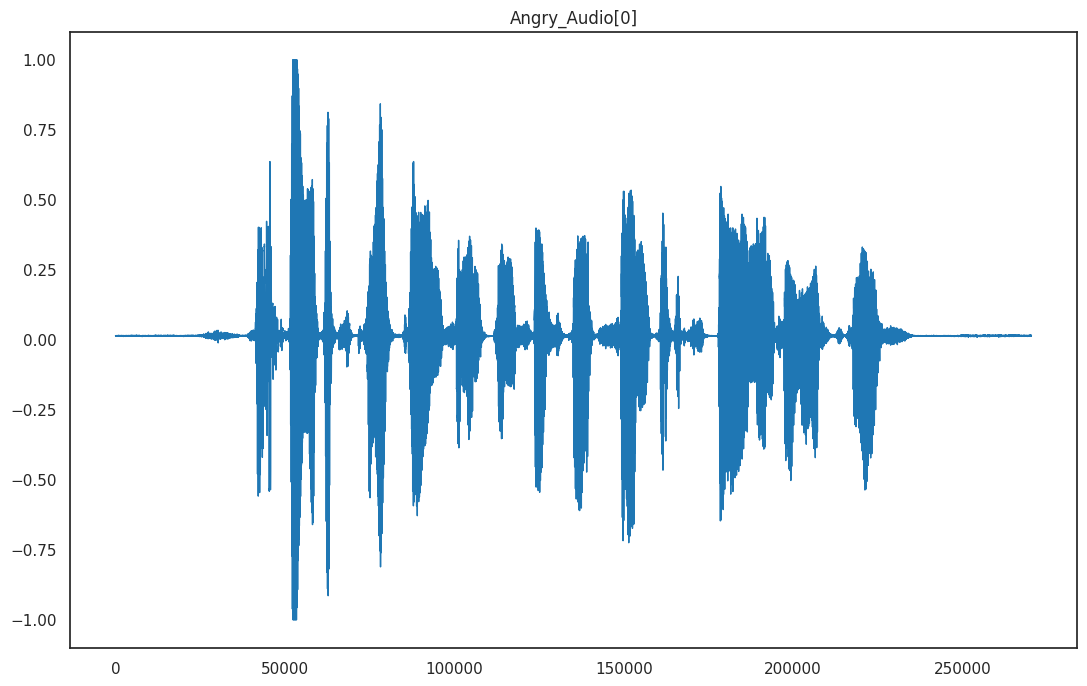

In [ ]:
# plot the audio 
pd.Series(y).plot(figsize=(13,8), lw=1 ,title = "Angry_Audio[0]")
plt.show()

**Spectrogram visualization**

In [ ]:
spectro = librosa.stft(y)
sp = librosa.amplitude_to_db(np.abs(spectro), ref=np.max)
sp.shape

(1025, 528)

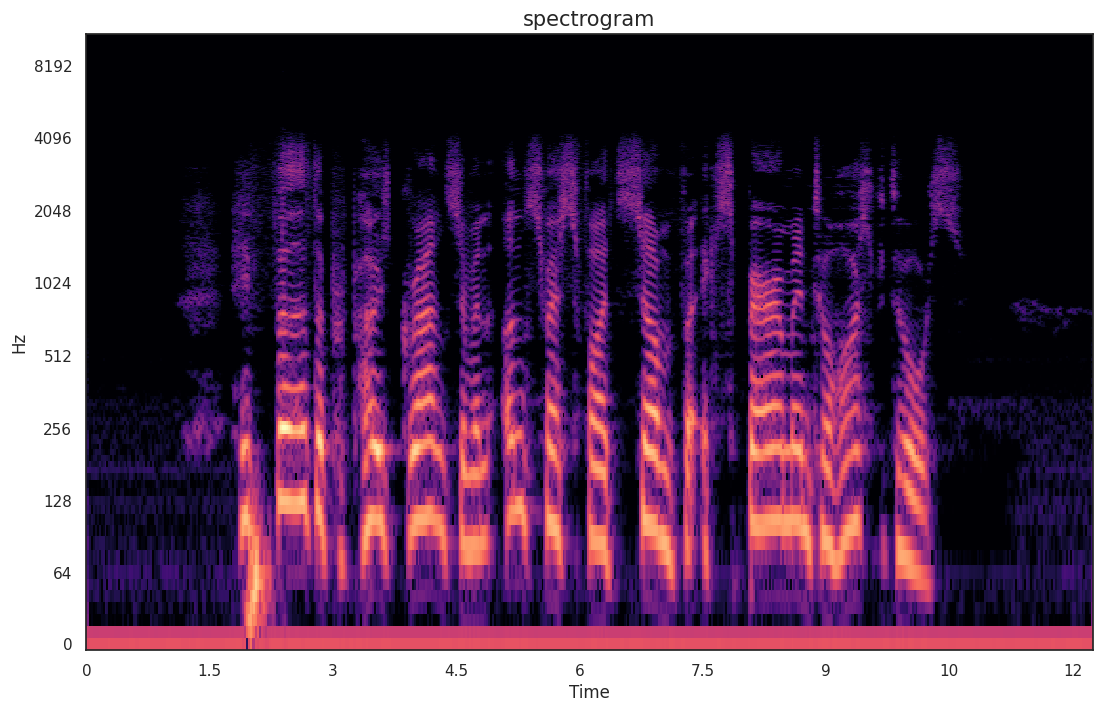

In [ ]:
fig ,ax = plt.subplots(figsize=(13,8))
img = librosa.display.specshow(sp,x_axis="time",y_axis="log",ax=ax)
ax.set_title("spectrogram",fontsize=15)
plt.show()

**Mel-Spectrogram visualization**

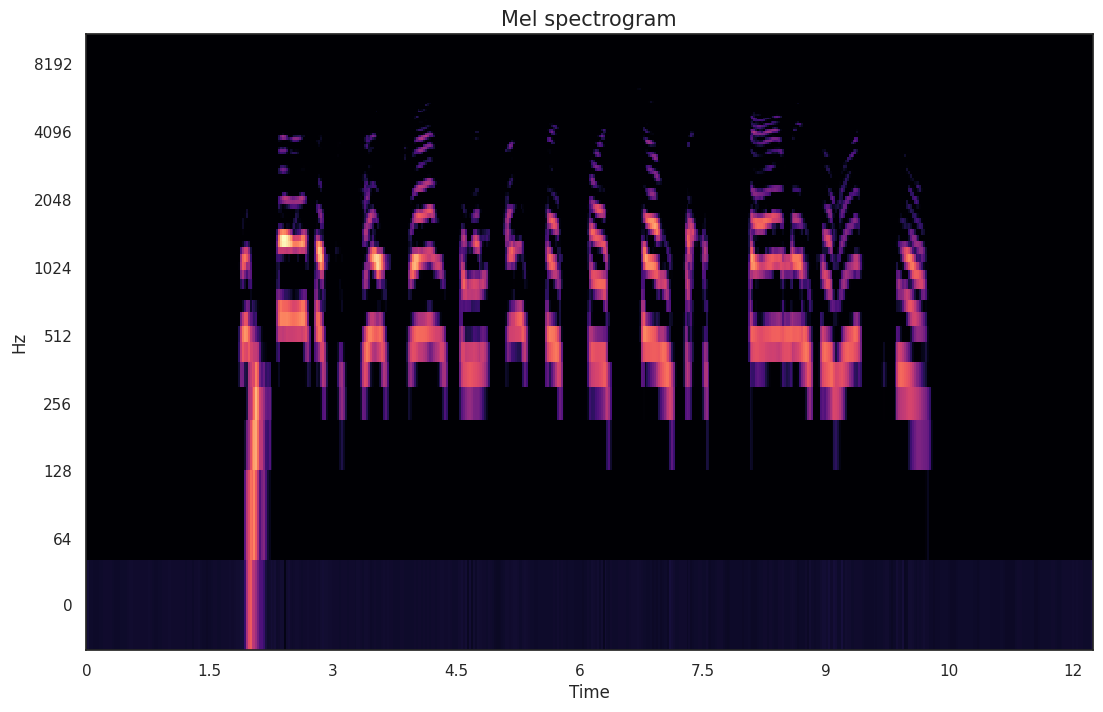

In [ ]:
sspectro = librosa.feature.melspectrogram(y=y , sr = sr, n_mels =128)
sp_mel = librosa.amplitude_to_db(np.abs(sspectro), ref=np.max)

fig ,ax = plt.subplots(figsize=(13,8))
img = librosa.display.specshow(sp_mel,x_axis="time",y_axis="log",ax=ax)
ax.set_title("Mel spectrogram",fontsize=15)
plt.show()